Missing Values in Each Column:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
***************************************************************************************************************************


Basic Statistics:
        Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000
***************************************************************************************************************************



<Figure size 1200x800 with 0 Axes>

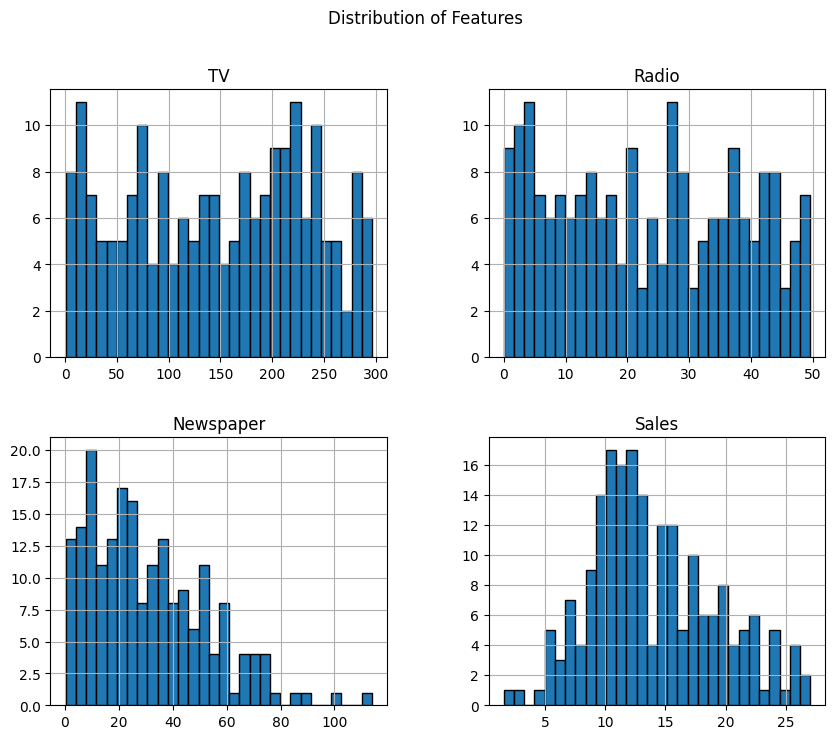

***************************************************************************************************************************



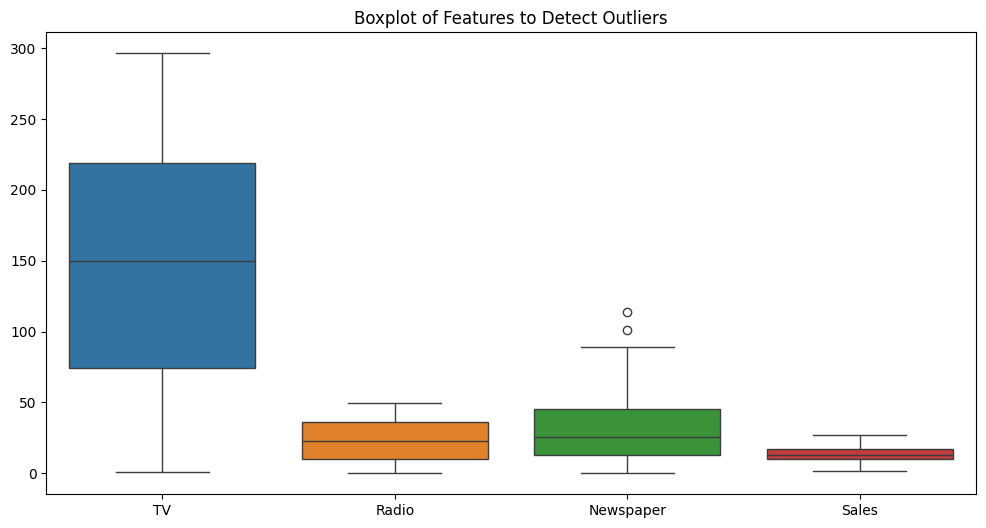

***************************************************************************************************************************



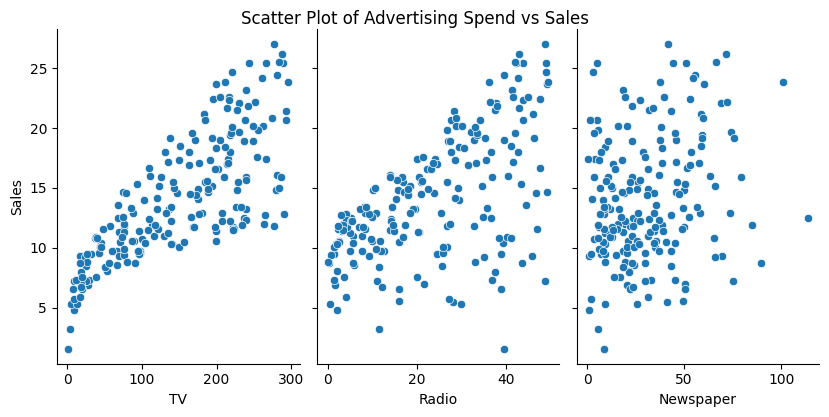

***************************************************************************************************************************



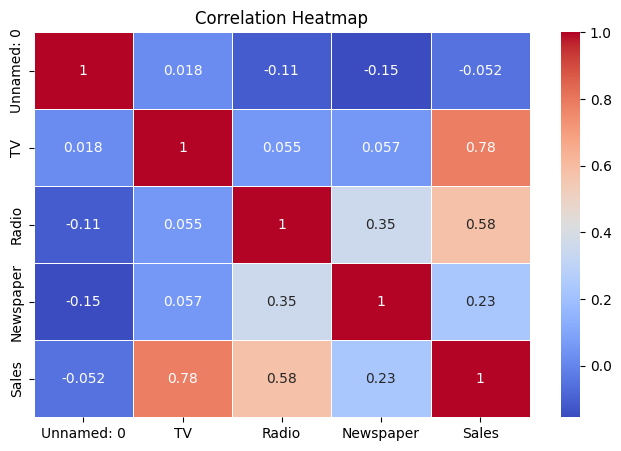

***************************************************************************************************************************

Number of outliers detected in 'Newspaper': 2
Outliers in 'Newspaper':
      Unnamed: 0     TV  Radio  Newspaper  Sales
16           17   67.8   36.6      114.0   12.5
101         102  296.4   36.3      100.9   23.8
Original dataset size: 200 rows
Cleaned dataset size: 198 rows
Number of outliers removed: 2
***************************************************************************************************************************

Mean Squared Error (MSE) in percentage: 274.0912%
Root Mean Squared Error (RMSE): 1.6556
Mean Absolute Error (MAE): 1.2497
Mean Absolute Percentage Error (MAPE): 11.7372%
R²: 0.8989
Adjusted R²: 0.8905
***************************************************************************************************************************



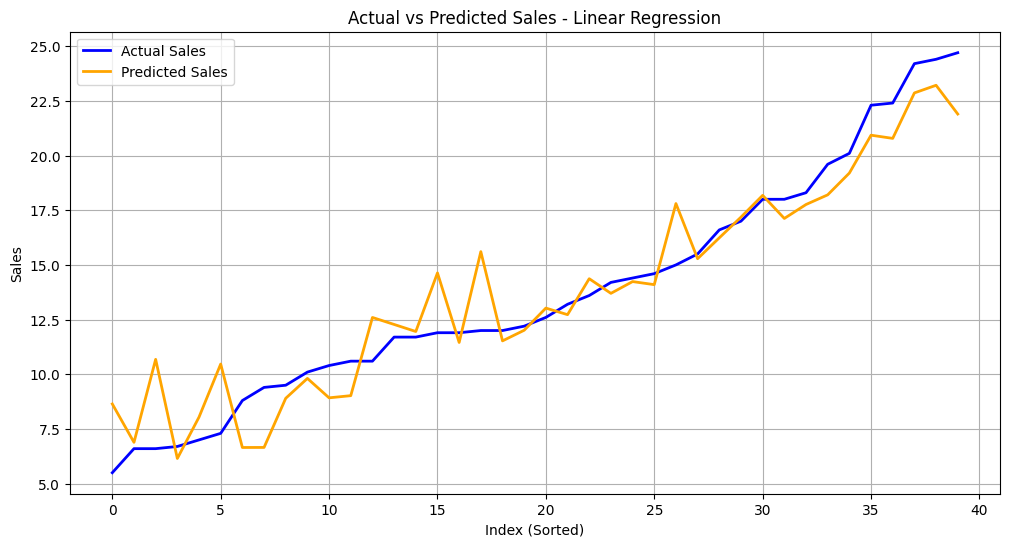

***************************************************************************************************************************



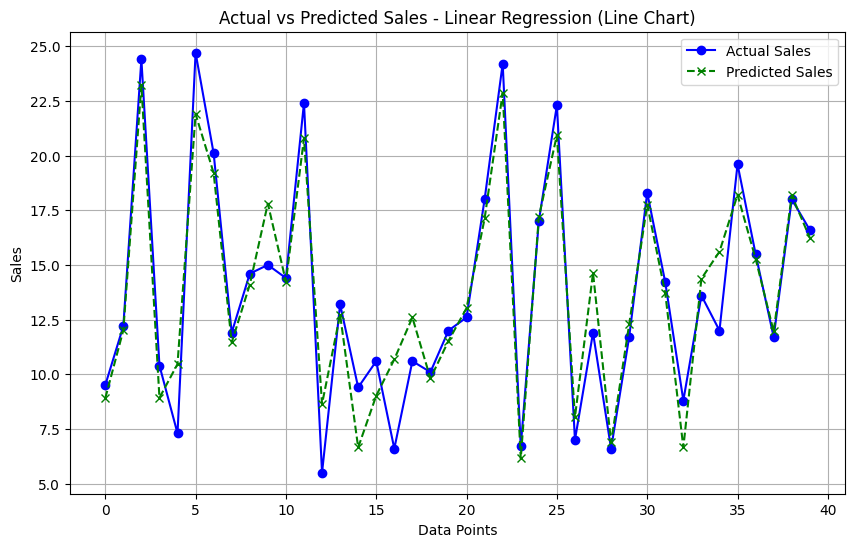

***************************************************************************************************************************

Best alpha value for Lasso: 10.0
Mean Squared Error (MSE) in percentage after Lasso: 334.8603%
Root Mean Squared Error (RMSE) after Lasso: 1.8299
Mean Absolute Error (MAE) after Lasso: 1.3620
Mean Absolute Percentage Error (MAPE) after using Lasso Regression: 11.6324%
R² after Lasso: 0.8765
Adjusted R² after Lasso: 0.8663
***************************************************************************************************************************

Mean Squared Error (MSE) in percentage after Ridge: 33.9825%
Root Mean Squared Error (RMSE) after Ridge: 0.5829
Mean Absolute Error (MAE) after Ridge: 0.4687
Mean Absolute Percentage Error (MAPE) after Ridge: 4.4647%
R² after Ridge: 0.9875
Adjusted R² after Ridge: 0.9837
***************************************************************************************************************************

Best alpha for Elastic Net: 1

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

# Load the dataset
advertising_data = pd.read_csv('/content/Advertising.csv')

# ---- Step 1: Data Preprocessing ----
# Check for missing values
print("Missing Values in Each Column:\n", advertising_data.isnull().sum())
print("***************************************************************************************************************************\n")

# Summary statistics of the dataset
print("\nBasic Statistics:\n", advertising_data.describe())
print("***************************************************************************************************************************\n")

# ---- Step 2: Data Visualization ----
# Histogram to understand the distribution of each feature
plt.figure(figsize=(12, 8))
advertising_data[['TV', 'Radio', 'Newspaper', 'Sales']].hist(bins=30, edgecolor='black', figsize=(10, 8))
plt.suptitle('Distribution of Features')
plt.show()
print("***************************************************************************************************************************\n")

# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=advertising_data[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.title('Boxplot of Features to Detect Outliers')
plt.show()
print("***************************************************************************************************************************\n")

# Scatter plots to check the relationship between features and target
sns.pairplot(advertising_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.7, kind='scatter')
plt.suptitle('Scatter Plot of Advertising Spend vs Sales', y=1.02)
plt.show()
print("***************************************************************************************************************************\n")

# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(advertising_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
print("***************************************************************************************************************************\n")

# ---- Step 3: Handling Outliers in 'Newspaper' ----
# IQR method to identify outliers in 'Newspaper'
Q1 = advertising_data['Newspaper'].quantile(0.25)
Q3 = advertising_data['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = advertising_data[(advertising_data['Newspaper'] < lower_bound) | (advertising_data['Newspaper'] > upper_bound)]
print(f"Number of outliers detected in 'Newspaper': {len(outliers)}")
print("Outliers in 'Newspaper':\n", outliers)

# Removing outliers
advertising_data_cleaned = advertising_data[
    (advertising_data['Newspaper'] >= lower_bound) &
    (advertising_data['Newspaper'] <= upper_bound)
]

# Display the number of rows before and after removing outliers
print(f"Original dataset size: {advertising_data.shape[0]} rows")
print(f"Cleaned dataset size: {advertising_data_cleaned.shape[0]} rows")
print(f"Number of outliers removed: {advertising_data.shape[0] - advertising_data_cleaned.shape[0]}")
print("***************************************************************************************************************************\n")

# ---- Step 4: Linear Regression Implementation ----
# Preparing the data (Features and target variable)
X = advertising_data_cleaned[['TV', 'Radio', 'Newspaper']]  # Features
y = advertising_data_cleaned['Sales']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Training the model

# Predicting the test set results
y_pred = lr_model.predict(X_test)

# ---- Step 5: Evaluation Metrics for Linear Regression ----
# Mean Squared Error (MSE) in percentage
mse = mean_squared_error(y_test, y_pred) * 100  # MSE in percentage

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # MAPE in percentage

# R² and Adjusted R²
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# ---- Step 6: Output Results for Linear Regression ----
print(f"Mean Squared Error (MSE) in percentage: {mse:.4f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")
print("***************************************************************************************************************************\n")

# ---- Step 6.1: Line Chart for Actual vs Predicted Values ----
#Shows a sorted view of actual vs. predicted sales, helping to visualize performance across the range of values.
plt.figure(figsize=(12, 6))
# Sorting the values for better visualization
sorted_indices = np.argsort(y_test)
plt.plot(np.array(y_test)[sorted_indices], label='Actual Sales', color='blue', linewidth=2)
plt.plot(np.array(y_pred)[sorted_indices], label='Predicted Sales', color='orange', linewidth=2)
plt.title('Actual vs Predicted Sales - Linear Regression')
plt.xlabel('Index (Sorted)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
print("***************************************************************************************************************************\n")

# ---- Step 6.2: Line Chart for Actual vs Predicted (Linear Regression) ----
#Second Chart: Displays actual vs. predicted sales in the original order, highlighting the model's performance on specific instances.
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicted Sales', color='green', linestyle='--', marker='x')
plt.title('Actual vs Predicted Sales - Linear Regression (Line Chart)')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
print("***************************************************************************************************************************\n")

# ---- Step 7: Lasso Regression with GridSearchCV for Improvement ----
# Define the model and parameters
lasso = Lasso()
params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lasso, param_grid=params, scoring='neg_mean_absolute_percentage_error', cv=5)
grid_search.fit(X_train, y_train)

# Best alpha value
print(f"Best alpha value for Lasso: {grid_search.best_params_['alpha']}")

# Train Lasso with the best alpha value
lasso_model = Lasso(alpha=grid_search.best_params_['alpha'])
lasso_model.fit(X_train, y_train)

# Predicting the test set results for Lasso Regression
y_pred_lasso = lasso_model.predict(X_test)

# ---- Step 8: Evaluation Metrics for Lasso ----
# Mean Absolute Percentage Error (MAPE) for Lasso
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso) * 100  # MAPE in percentage

# Mean Squared Error (MSE) in percentage for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso) * 100  # MSE in percentage
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
adjusted_r2_lasso = 1 - (1 - r2_lasso) * (n - 1) / (n - p - 1)

# Output results for Lasso
print(f"Mean Squared Error (MSE) in percentage after Lasso: {mse_lasso:.4f}%")
print(f"Root Mean Squared Error (RMSE) after Lasso: {rmse_lasso:.4f}")
print(f"Mean Absolute Error (MAE) after Lasso: {mae_lasso:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) after using Lasso Regression: {mape_lasso:.4f}%")
print(f"R² after Lasso: {r2_lasso:.4f}")
print(f"Adjusted R² after Lasso: {adjusted_r2_lasso:.4f}")
print("***************************************************************************************************************************\n")

# ---- Step 9: Ridge Regression Implementation ----
# Create polynomial features for Ridge Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the dataset into training and testing sets for Ridge Regression
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Implementing Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)

# Predicting the test set results for Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_poly)

# ---- Evaluation Metrics for Ridge ----
# Mean Squared Error (MSE) in percentage for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge) * 100

# Root Mean Squared Error (RMSE) for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Mean Absolute Error (MAE) for Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Mean Absolute Percentage Error (MAPE) for Ridge
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100  # MAPE in percentage

# R² and Adjusted R² for Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
n = X_test_poly.shape[0]  # Number of samples
p = X_test_poly.shape[1]  # Number of features after polynomial expansion
adjusted_r2_ridge = 1 - (1 - r2_ridge) * (n - 1) / (n - p - 1)

# ---- Output Results for Ridge ----
print(f"Mean Squared Error (MSE) in percentage after Ridge: {mse_ridge:.4f}%")
print(f"Root Mean Squared Error (RMSE) after Ridge: {rmse_ridge:.4f}")
print(f"Mean Absolute Error (MAE) after Ridge: {mae_ridge:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) after Ridge: {mape_ridge:.4f}%")
print(f"R² after Ridge: {r2_ridge:.4f}")
print(f"Adjusted R² after Ridge: {adjusted_r2_ridge:.4f}")
print("***************************************************************************************************************************\n")

# ---- Step 10: Elastic Net Regression Implementation ----
# Initialize ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio
elastic_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]  # 1.0 corresponds to Lasso
}

# Use GridSearchCV for hyperparameter tuning
elastic_grid_search = GridSearchCV(
    elastic_net,
    param_grid=elastic_params,
    scoring='neg_mean_absolute_percentage_error',  # You can choose a different metric if preferred
    cv=5,
    n_jobs=-1  # Utilize all available cores
)

# Fit GridSearchCV on the training data
elastic_grid_search.fit(X_train, y_train)

# Best parameters
best_alpha_en = elastic_grid_search.best_params_['alpha']
best_l1_ratio_en = elastic_grid_search.best_params_['l1_ratio']
print(f"Best alpha for Elastic Net: {best_alpha_en}")
print(f"Best l1_ratio for Elastic Net: {best_l1_ratio_en}")

# Train Elastic Net with the best parameters
elastic_net_best = ElasticNet(alpha=best_alpha_en, l1_ratio=best_l1_ratio_en)
elastic_net_best.fit(X_train, y_train)

# Predicting the test set results for Elastic Net Regression
y_pred_elastic = elastic_net_best.predict(X_test)

# ---- Step 11: Evaluation Metrics for Elastic Net ----
# Mean Squared Error (MSE) in percentage
mse_elastic = mean_squared_error(y_test, y_pred_elastic) * 100  # MSE in percentage

# Root Mean Squared Error (RMSE)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

# Mean Absolute Error (MAE)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

# Mean Absolute Percentage Error (MAPE)
mape_elastic = mean_absolute_percentage_error(y_test, y_pred_elastic) * 100  # MAPE in percentage

# R² and Adjusted R²
r2_elastic = r2_score(y_test, y_pred_elastic)
n_elastic = X_test.shape[0]  # Number of samples
p_elastic = X_test.shape[1]  # Number of features
adjusted_r2_elastic = 1 - (1 - r2_elastic) * (n_elastic - 1) / (n_elastic - p_elastic - 1)

# ---- Step 12: Output Results for Elastic Net ----
print(f"Mean Squared Error (MSE) in percentage after Elastic Net: {mse_elastic:.4f}%")
print(f"Root Mean Squared Error (RMSE) after Elastic Net: {rmse_elastic:.4f}")
print(f"Mean Absolute Error (MAE) after Elastic Net: {mae_elastic:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) after Elastic Net: {mape_elastic:.4f}%")
print(f"R² after Elastic Net: {r2_elastic:.4f}")
print(f"Adjusted R² after Elastic Net: {adjusted_r2_elastic:.4f}")
print("***************************************************************************************************************************\n")

